In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.animation as animation # do the animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML  # display the animation in notebook

# Game of Life 

In [145]:
# values for cell on or off in the grid
alive = 1 # values for cell alive
dead = 0 # value for cell dead
vals = [alive, dead]

# GoF Patterns

In [160]:
#oscillators The "glider"
def glider(grid):
    glider = np.array([[0, 0, alive], [alive, 0, alive], [0, alive, alive]])
    grid[1:1+3, 1:1+3] = glider # add the glider in the top left corner, but we can change the code in order to put it where we want

### Update grid function

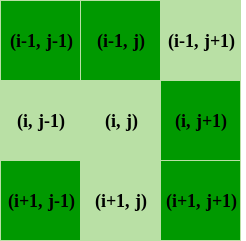

In [161]:
def update_grid(frameNum, img, grid, N):
    
    grid_tmp = grid.copy() # not to mess up with the original one
    for i in range(N):
        for j in range(N):
            # get the total number of neighbors of the cell
            neighbors = grid[(i+1)%N,j] + grid[i,(j+1)%N] + grid[(i-1)%N,j] + grid[i,(j-1)%N] + grid[(i+1)%N,(j+1)%N] + grid[(i-1)%N,(j-1)%N] + grid[(i+1)%N,(j-1)%N] + grid[(i-1)%N,(j+1)%N]
 
            # check if it is still alive or not
            if grid[i, j] == alive:
                if (neighbors < 2) or (neighbors > 3):
                    grid_tmp[i, j] = dead
            else:
                if neighbors == 3:  # a dead cell with 3 neighbors can reborn
                    grid_tmp[i, j] = alive
 
    # update the image
    img.set_data(grid_tmp)
    grid[:] = grid_tmp[:] # change the old grid
    
    return img, 

### Grid animation 

In [162]:
def show_GoF(grid, N):
    # show the grid 
    fig, ax = plt.subplots()
    img = ax.imshow(grid, interpolation='nearest', cmap='Greys') 
    animation_grid = FuncAnimation(fig, update_grid, fargs=(img, grid, N, ), frames=100, interval=500, save_count=50) # animation  # init_func=create_grid
    plt.close()
    
    return animation_grid

### Grid generation

In [169]:
# I will use a predefined number, then it could be chosen by the user as input.
# Grid = matrix NxN in a two dimensional space
# the random pattern is the default one if not explicitly declared, the same for the size
def create_grid(N=50, pattern='random'):
    
    # create grid for each case of pattern
    if(pattern == 'random'):
        grid = np.random.choice(vals, N*N, p=[0.2, 0.8]).reshape(N, N)
        
    elif(pattern == 'glider'):
        grid = np.zeros((N, N))
        glider(grid)
        
    # we could create classes for each pattern and return the grid 
        
    return grid

# GoF implementation

In [170]:
# here we can generate the grid with dimension and pattern parameters
# show the grid and the animation
N = 50
grid = create_grid(N, pattern='glider')
#print(grid)

In [171]:
# show the GoF grid animation
animation = show_GoF(grid, grid.shape[0])
HTML(animation.to_html5_video()) # must use it in notebook in order to visualize the animation